# Manipulación de datos y Pandas

Esta notebook es una traducción y adaptación de esta [notebook](https://github.com/fonnesbeck/Bios8366/blob/master/notebooks/Section2_1-Introduction-to-Pandas.ipynb) creada por Christopher Fonnesbeck.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import numpy as np
import pandas as pd  # asi se suele importar Pandas

**Pandas** es un paquete que Python que provee estructuras de datos rápidas, flexibles y expresivas diseñadas para trabajar con datos _rotulados_. Dichas estructuras de datos se pueden pensar como _arrays_ de NumPy donde las filas y columnas están rotuladas. O de forma similar como una _planilla de cálculo_ bajo Python.

Así como NumPy es una muy buena herramienta para trabajar con números, vectores, álgebra lineal, etc. Pandas es adecuado para trabajar con:

* Datos tabulares y heterogéneos (flotantes, string, enteros, etc)
* Series temporales
* Los mismos datos que se pueden manipular con _arreglos_ de NumPy!


¿Por qué es importante tener una herramienta como Pandas?


<img src="imagenes/analisis.png"  width=400>

El tiempo consumido (por un humano) en aplicar métodos estadísticos y/o de _machine learning_ es en muchos casos mucho menor que el tiempo requerido para obtener y procesar los datos. Pandas intenta facilitar el procesado de los datos y reducir el tiempo que este consumen para que podamos aumentar el tiempo que pasamos pensando en los problemas que queremos resolver. Procesar datos es una tarea que suele involucrar los siguientes pasos

1. Leer los datos: Los datos pueden estar contenidos en diversos formatos, CSV, HTML, xls, pdf, texto plano, imágenes, hojas de papel, etc
2. Procesar datos: Los datos rara vez están listos para usar, pueden faltar datos, haber dudas sobre los valores registrados, inconsistencias, etc. Además puede ser necesario generar _datos derivados_ a partir de los datos disponibles, por ej podríamos necesitar la densidad poblacional pero solo tenemos la población y la superficie.
3. Almacenar datos: Ya sea para pasárselos a otra pieza de software para por ej visualizar o hacer un análisis estadístico de los datos, o ya sea para su posterior uso por nosotros o terceros.


Pandas introduce fundamentalmente 3 nuevas estructuras de datos:
* Las `Series` 
* Los `DataFrame`
* Los `Index`

Empecemos por la primera de estas.

## Series

Una `Series` de Pandas es un conjunto unidimensional de datos (similar a un _array_) acompañados de un índice que "rotula" a cada elemento del vector. Puede ser creada a partir de un array o tupla o lista.

In [2]:
conteo = pd.Series([632, 1638, 569, 115])
conteo

0     632
1    1638
2     569
3     115
dtype: int64

Una `Series` tiene siempre dos _columnas_. La primer _columna_ contiene los índices y la segunda los datos. En el ejemplo anterior, pasamos una lista de datos y omitimos el índice por lo que Pandas creo un índice automáticamente usando una secuencia de enteros, empezando por 0 (como es usual en Python). 

La idea que una `Series` es un _array_ con un índice explícito, no es solo una metáfora. De hecho a partir de una Serie es posible obtener el _array_ de NumPy "contenido" en ella.

In [3]:
conteo.values

array([ 632, 1638,  569,  115])

Y también es posible obtener el índice.

In [4]:
conteo.index

RangeIndex(start=0, stop=4, step=1)

### Indexado

Es importante notar que los arreglos de NumPy también tienen índices, solo que estos están implícitios y siempre son enteros comenzando desde el 0. En cambio los `Index` en Pandas son explícitos y no están limitados a enteros. Podemos asignar rótulos que tengan sentido según nuestros datos. Si nuestros datos representan la cantidad de bacterias según sus _especies_, podríamos tener algo como:

In [5]:
bacteria = pd.Series([632, 1638, 569, 115],
                     index=['Firmicutes', 'Proteobacteria',
                            'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

Ahora el `Index` contiene `strings` en lugar de enteros. Es posible que estos pares rótulo-dato nos recuerdan a  un diccionario. Si esta analogía es válida deberíamos poder usar los rótulos para referirnos directamente a los valores contenidos en la serie.

In [6]:
bacteria['Actinobacteria']

569

Incluso podemos crear Series a partir de diccionarios

In [7]:
bacteria_dict = {'Firmicutes': 632,
                 'Proteobacteria': 1638,
                 'Actinobacteria': 569,
                 'Bacteroidetes': 115}

pd.Series(bacteria_dict)

Actinobacteria     569
Bacteroidetes      115
Firmicutes         632
Proteobacteria    1638
dtype: int64

O podemos hacerlo de forma algo más breve usando atributos. Un atributo es el nombre que se le da a un dato o propiedad en programación orientada a objetos. En el siguiente ejemplo `bacteria` es un objeto y `Actinobacteria` el atributo.

In [8]:
bacteria.Actinobacteria

569

El hecho que tengamos índices explícitos, como los nombres de bacterias, no elimina la posibildiad de acceder a los datos usando índices _implicitos_, como es común hacer con listas y arreglos.

In [9]:
bacteria[2]

569

**Si tuvieras una `Series` con índices que fuesen enteros ¿Qué pasaría al indexarla?**

    una_series[1]

**¿Obtendríamos el segundo elemento de la `Series` o el elemento cuyo índice explícito es 1? ¿Y si el ńumero 1 no estuviera contenido en el índice de la `Series`?**

Más adelante veremos que solución ofrece Pandas para evitar confusiones. Pero mientras quizá podemos pensar una solución y discutirla.

<br>
<br>
<br>
<br>

Al igual que con los arreglos de NumPy podemos usar booleanos para indexar una serie. De esta forma podemos contestar la pregunta: ¿Cuáles bacterias dieron conteos superiores a 1000? de forma bastante _intuitiva_ (¿Es realmente intuitiva?).

In [10]:
bacteria[bacteria > 1000]

Proteobacteria    1638
dtype: int64

O podríamos necesitar encontrar el subconjunto de bacterias cuyos nombres terminan en "bacteria":

In [11]:
bacteria[[nombre.endswith('bacteria') for nombre in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

### Slicing

Es posible hacer `slicing` incluso cuando los índices son `strings`. 

In [12]:
bacteria['Proteobacteria':]

Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

### Funciones universales

Pandas toma prestado de NumPy el concepto de función universal (_ufunc_) y le agrega un detalle, los rótulos se preservan sin modificación.

In [13]:
np.log(bacteria)

Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
dtype: float64

### Operación entre Series

Ahora vamos a crear una nueva Series a partir de un diccionario, pero especificando los índices

In [14]:
bacteria2 = pd.Series(bacteria_dict,
                      index=['Cyanobacteria',
                             'Firmicutes',
                             'Actinobacteria'])
bacteria2

Cyanobacteria       NaN
Firmicutes        632.0
Actinobacteria    569.0
dtype: float64

Observemos dos detalles de este ejemplo. El orden en el que aparecen los elementos es el mismo que el orden especificado por el argumento `index`, comparemos esto con el caso anterior donde creamos una `Series` a partir de un diccionario, pero sin especificar el índice. 
El otro detalle es que hemos pasado un rótulo para un valor que no existe en el diccionario (y hemos omitido dos valores que si existen). Como resultado Pandas no devolvió un error, si no que interpretó que tenemos datos faltantes (_missing data_). El dato faltante se indica utilizando un tipo especial de _float_ `NaN` (del inglés Not A Number).

Los índices no son solo una conveniencia para manipular datos haciendo referencia a nombres que nos puede resultar más familiares o convenientes (comparado con recordar la posición de los datos). Los índices son usados para **alinear datos** al operar con más de una serie, por ej podríamos querer obtener el total de bacterias en dos conjuntos de datos.

In [15]:
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria       NaN
dtype: float64

Pandas sumó solo los valores para  los cuales los índices de ambas `Series` coinciden! Y además propagó los valores faltantes (`NaN`). 

**¿Qué sucede si intentamos sumar dos arreglos de NumPy de distinta longitud?**
<br>
<br>
<br>
<br>

## DataFrame

Al analizar datos es común que tengamos que trabajar con datos multivariados. Para esos casos es útil tener algo como una `Series` donde a cada índice le correspondan más de una columna de valores. Ese objeto se llama `DataFrame`.

Un `DataFrame` es una estructura de datos tabular que se puede pensar como una colección de `Series` que comparten un mismo índice. También es posible pensar un `DataFrame` como una generalización de un arreglo de NumPy o la generalización de un diccionario.

In [16]:
datos = pd.DataFrame({'conteo':[632, 1638, 569, 115, 433, 1130, 754, 555],
                      'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'] * 2,
                      'paciente':np.repeat([1, 2], 4)})

datos

,conteo,paciente,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,1130,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


Lo primero que notamos es que `Jupyter` le pone onda al `DataFrame`, y lo muestra como una tabla con algunas mejoras estéticas.

También podemos ver que contrario a un arreglo de NumPy en un `DataFrame` es posible tener datos de distinto tipo (enteros y _strings_ en este caso). Además se ve que las columnas están ordenadas alfabéticamente, podemos cambiar el orden indexando el `DataFrame` en el orden preferido.

In [17]:
datos[['paciente', 'phylum', 'conteo']]

,paciente,phylum,conteo
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


Los `DataFrame` tienen dos `Index`:

* Uno que se corresponde con las filas, al igual que como vimos con las Series
* Uno que se corresponde con las columnas

In [18]:
datos.columns

Index(['conteo', 'paciente', 'phylum'], dtype='object')

Es posible acceder a los valores de las columnas de forma similar a como lo haríamos en una Series o en un diccionario.

In [19]:
datos['conteo']

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: conteo, dtype: int64

También podemos hacerlo por atributo.

In [20]:
datos.conteo

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: conteo, dtype: int64

Una posible fuente  de confusión es que la sintaxis que acabamos de ver devuelve filas en una `Series`, pero columnas en un `DataFrame`. Si queremos acceder a las filas de un `DataFrame` podemos hacerlo usando el atributo `loc`:

In [21]:
datos.loc[3]

conteo                115
paciente                1
phylum      Bacteroidetes
Name: 3, dtype: object

**¿Que pasa si intentamos acceder a una fila usando la sintaxis `datos[3]`?**

<br>
<br>
<br>
<br>

La `Series` que se obtienen al indexar un `DataFrame` es una _vista_ (_view_) del `DataFrame` y NO una copia. Por lo que hay que tener cuidado al manipularla, por ello Pandas nos devuelve una advertencia.

In [22]:
cont = datos['conteo']
cont

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: conteo, dtype: int64

In [23]:
cont[5] = 0
cont

/home/osvaldo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: conteo, dtype: int64

In [24]:
datos

,conteo,paciente,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,0,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


Si queremos modificar una `Series` que proviene de un `DataFrame` puede ser buena idea hacer una copia primero.

In [25]:
cont = datos['conteo'].copy()
cont[5] = 1000
datos

,conteo,paciente,phylum
0,632,1,Firmicutes
1,1638,1,Proteobacteria
2,569,1,Actinobacteria
3,115,1,Bacteroidetes
4,433,2,Firmicutes
5,0,2,Proteobacteria
6,754,2,Actinobacteria
7,555,2,Bacteroidetes


Es posible agregar columnas a un `DataFrame` mediante una asignación.

In [26]:
datos['año'] = 2013
datos

,conteo,paciente,phylum,año
0,632,1,Firmicutes,2013
1,1638,1,Proteobacteria,2013
2,569,1,Actinobacteria,2013
3,115,1,Bacteroidetes,2013
4,433,2,Firmicutes,2013
5,0,2,Proteobacteria,2013
6,754,2,Actinobacteria,2013
7,555,2,Bacteroidetes,2013


Podemos agregar una `Series` como una nueva columna en un `DataFrame`, el resultado dependerá de los índices de ambos objetos.

In [27]:
tratamiento = pd.Series([0]*5 + [1]*3)
tratamiento

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
dtype: int64

In [28]:
datos['tratamiento'] = tratamiento
datos

,conteo,paciente,phylum,año,tratamiento
0,632,1,Firmicutes,2013,0
1,1638,1,Proteobacteria,2013,0
2,569,1,Actinobacteria,2013,0
3,115,1,Bacteroidetes,2013,0
4,433,2,Firmicutes,2013,0
5,0,2,Proteobacteria,2013,1
6,754,2,Actinobacteria,2013,1
7,555,2,Bacteroidetes,2013,1


**¿Qué sucede si intentamos agregar una nueva columna a partir de una lista cuya longitud no coincida con la del `DataFrame`? ¿Y si en vez de una lista es una `Series`?**

<br>
<br>
<br>
<br>

In [29]:
datos['mes'] = ['enero'] * len(datos)
datos

,conteo,paciente,phylum,año,tratamiento,mes
0,632,1,Firmicutes,2013,0,enero
1,1638,1,Proteobacteria,2013,0,enero
2,569,1,Actinobacteria,2013,0,enero
3,115,1,Bacteroidetes,2013,0,enero
4,433,2,Firmicutes,2013,0,enero
5,0,2,Proteobacteria,2013,1,enero
6,754,2,Actinobacteria,2013,1,enero
7,555,2,Bacteroidetes,2013,1,enero


Podemos usar `del` para eliminar columnas, de la misma forma que podemos hacerlo con diccionarios.

In [30]:
del datos['mes']
datos

,conteo,paciente,phylum,año,tratamiento
0,632,1,Firmicutes,2013,0
1,1638,1,Proteobacteria,2013,0
2,569,1,Actinobacteria,2013,0
3,115,1,Bacteroidetes,2013,0
4,433,2,Firmicutes,2013,0
5,0,2,Proteobacteria,2013,1
6,754,2,Actinobacteria,2013,1
7,555,2,Bacteroidetes,2013,1


Es posible _extraer_ los datos de un `DataFrame` en forma de arreglo de NumPy.

In [31]:
datos.values

array([[632, 1, 'Firmicutes', 2013, 0],
       [1638, 1, 'Proteobacteria', 2013, 0],
       [569, 1, 'Actinobacteria', 2013, 0],
       [115, 1, 'Bacteroidetes', 2013, 0],
       [433, 2, 'Firmicutes', 2013, 0],
       [0, 2, 'Proteobacteria', 2013, 1],
       [754, 2, 'Actinobacteria', 2013, 1],
       [555, 2, 'Bacteroidetes', 2013, 1]], dtype=object)

Fijense que el `dtype` del arreglo es `object`. Esto se debe a la mezcla de enteros, _strings_ y flotantes. El `dtype` es elegido por Pandas automaticamente de forma tal de acomodar todos los tipos de valores presentes en el `DataFrame`. 

**¿Qué hubiéramos obtenido si la columna `phylum` no fuese parte del dataFrame?**

<br>
<br>
<br>
<br>

## Index

La última estructura de datos que nos queda ver es `Index`, la cual en realidad la venimos usando desde el principio de este capítulo. Solo que ahora hablaremos de ella de forma un poco más explícita.

In [32]:
datos.index

RangeIndex(start=0, stop=8, step=1)

Los `Index` son _inmutables_, no puede ser modificados una vez creados, lo cual pueden comprobar al descomentar y ejecutar la siguiente celda.

In [33]:
#datos.index[0] = 15

La inmutabilidad del `Index` tiene como función permitir que los `Index` se compartan entre objetos sin riesgo de que se modifiquen en algún momento. Esto es lo que permite agregar una `Series` a un `DataFrame` aunque sus longitudes no coincidan, Pandas busca que sean los índices los que coincidan y si hiciera falta completa los valores que sean necesarios. 

## Importando datos

En principio es posible usar Python para leer cualquier archivo que uno desee, pero para el trabajo rutinario de un científico de datos es preferible tener a mano funciones _enlatadas_ que permitan leer los formatos más comunes. NumPy provee de algunas funciones para leer archivos, como `genfromtxt` y `loadtxt`. Pandas ofrece funciones más vestátiles y robustas. Empecemos leyendo un archivo en formato `csv` (_comma separated values_).

In [34]:
!head datos/microbioma.csv  # este es un comando de Linux que nos permite ver las primeras lineas de un archivo

Taxon,Paciente,Grupo,Tejido,Heces
Firmicutes,1,0,136,4182
Firmicutes,2,1,1174,703
Firmicutes,3,0,408,3946
Firmicutes,4,1,831,8605
Firmicutes,5,0,693,50
Firmicutes,6,1,718,717
Firmicutes,7,0,173,33
Firmicutes,8,1,228,80
Firmicutes,9,0,162,3196


Pandas ofrece una función llamada `read_csv` ideal para leer este tipo de datos:

In [35]:
mb = pd.read_csv('datos/microbioma.csv')

In [36]:
type(mb)

pandas.core.frame.DataFrame

De forma similar al comando `head` de Linux, le podemos pedir a Pandas que nos nuestre solo las primeras lineas.

In [37]:
mb.head()

,Taxon,Paciente,Grupo,Tejido,Heces
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605
4,Firmicutes,5,0,693,50


Por defecto `read_csv` usará la primer linea del archivo como encabezado (_header_). Este comportamiento lo podemos modificar usando el argumento `header`.

In [38]:
pd.read_csv('datos/microbioma.csv', header=None).head()

,0,1,2,3,4
0,Taxon,Paciente,Grupo,Tejido,Heces
1,Firmicutes,1,0,136,4182
2,Firmicutes,2,1,1174,703
3,Firmicutes,3,0,408,3946
4,Firmicutes,4,1,831,8605


Por defecto `read_csv` usa `,` como separadores, pero es posible modificar este comportamiento usando el argumento `sep`. Un caso muy común es el de archivos que tienen una cantidad variable de espacios en blanco. En esos casos podemos usar una [expresión regular](https://docs.python.org/3.6/library/re.html):
 
    sep='\s+'

`'\s+'` quiere decir "1 o más espacios en blanco". Otro caso común son archivos separados por tabulaciones (tabs), en ese caso podemos usar `\t`.

Si queremos omitir datos (por ejemplo datos mal tomados), podemos indicaselo a Pandas usando el argumento `skiprows`:

In [39]:
pd.read_csv('datos/microbioma.csv', skiprows=[3,4,6]).head()

,Taxon,Paciente,Grupo,Tejido,Heces
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,5,0,693,50
3,Firmicutes,7,0,173,33
4,Firmicutes,8,1,228,80


También podemos indicarque que solo queremos importar unas pocas columnas, lo que puede ser muy útil cuando estamos haciendo pruebas y explorando los datos y queremos evitar importar un larga lista de datos.

In [40]:
pd.read_csv('datos/microbioma.csv', nrows=4)

,Taxon,Paciente,Grupo,Tejido,Heces
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605


Pandas ofrece la capacidad de leer varios otros formatos incluyendo archivos `xls`, `xlsx`, `JSON`, `XML`, `HDF5`, etc. Para más información leer la documentación de Pandas o [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

### Datos faltantes

Es común al analizar datos encontrarnos con datos faltantes. Las razones son variadas desde errores de transcripción, errores en la toma de muestra, observaciones incompletas, etc. En algunos casos estos datos faltantes quedan registrados simplemente como _huecos_ en el conjunto de datos o usando algunos _valores sentinelas_ como `NaN`, `None` o valores que esten _claramente_ fuera del rango de los datos como podrían ser `-9999` para valores de datos positivos o `999` para valores que, estamos seguros, son inferiores a 100.

In [41]:
!head datos/microbioma_faltantes.csv

Taxon,Paciente,Tejido,Heces
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,NA


In [42]:
mbm = pd.read_csv('datos/microbioma_faltantes.csv')
mbm.head(14)

,Taxon,Paciente,Tejido,Heces
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196.0


En el ejemplo anterior Pandas reconoció correctamente a `NA` y a un campo vacío como datos faltantes, pero pasó por alto a `?` y a `-99999`. Es facil pasar por alto estos errores, por lo que siempre es buena idea hacer gráficos de los datos y resúmenes como el siguiente:

In [43]:
mbm.describe()

,Paciente,Heces
count,75.000000,74.000000
mean,8.000000,-619.283784
std,4.349588,11801.273013
min,1.000000,-99999.000000
25%,4.000000,12.500000
50%,8.000000,79.500000
75%,12.000000,658.500000
max,15.000000,8605.000000


Se puede ver que el conteo (_count_) para `Paciente` y `Heces` no coinciden, que el valor más pequeño para `Heces` es un número negativo cuando debería ser mayor o igual a cero. Y vemos que no tenemos descripción para `Tejido`! 

**¿Se te ocurre por que falta la columna para `Tejido`?**
<br>
<br>
<br>
<br>


Podemos indicarle a Pandas que valores debe considerar como datos faltantes. Para eso usamos el argumento `na_values`.

In [44]:
mbm = pd.read_csv('datos/microbioma_faltantes.csv', na_values=['?', -99999])

In [45]:
mbm.describe()

,Paciente,Tejido,Heces
count,75.000000,73.000000,73.000000
mean,8.000000,984.315068,742.082192
std,4.349588,1840.338155,1467.675342
min,1.000000,0.000000,0.000000
25%,4.000000,109.000000,14.000000
50%,8.000000,310.000000,83.000000
75%,12.000000,831.000000,661.000000
max,15.000000,12044.000000,8605.000000


Si fuese necesario especificar valores distintos para distintas columnas es posible pasar un diccionario a `na_values`, indicando los nombres de las columnas y los valores a usar como indicadores. 

**Este es un buen momento para que pruebes como hacer esto antes de seguir con la nueva sección.**
<br>
<br>
<br>
<br>


#### Operaciones con datos faltantes

Pandas ofrece métodos que nos permiten detectar, remover  y reemplazar datos faltantes. Podemos preguntar a Pandas cuales son los valores _null_.

In [46]:
mbm.isnull()[:3]  # y su opuesto .notnull()

,Taxon,Paciente,Tejido,Heces
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False


O podríamos querer eliminar los valores _nulos_. Esto es posible usando `dropna()`. En el caso de una `Series` es posible eliminar solo los valores _nulos_. En el caso de `DataFrames` esto no es posible, a menos que eliminemos toda la fila (o columna) donde aparece ese valor nulo. Por defecto `dropna()` eliminará todas las filas que contengan al menos un valor _nulo_.

In [47]:
mbm.dropna().head(11)

,Taxon,Paciente,Tejido,Heces
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
9,Firmicutes,10,162.0,3196.0
11,Firmicutes,12,4255.0,4361.0
12,Firmicutes,13,107.0,1667.0


Es posible que no estemos interesados en remover los valores _nulos_ si no que en cambio nos interese _rellenar_ los valores _nulos_ con algún número que tenga sentido para nuestro análisis.

In [48]:
mbm.fillna(42).head(11)

,Taxon,Paciente,Tejido,Heces
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,42.0,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
8,Firmicutes,9,228.0,42.0
9,Firmicutes,10,162.0,3196.0


O simplemente completando con otros valores del propio `DataFrame`.

In [49]:
mbm.fillna(method='ffill').head(11)

,Taxon,Paciente,Tejido,Heces
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,136.0,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
8,Firmicutes,9,228.0,33.0
9,Firmicutes,10,162.0,3196.0


### Gráficos

Pandas tiene la capacidad de generar gráficos a partir de `DataFrames` (y `Series`) mediante el método `plot`.

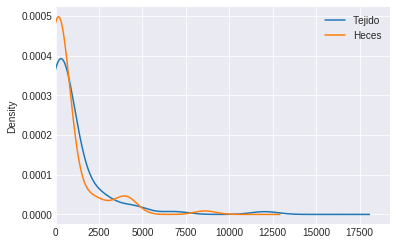

In [50]:
mbm[['Tejido', 'Heces']].plot(kind='kde', xlim=(0));

Internamente los gráficos son generados usando MatplotLib por lo que tenemos libertad para modificarlos, usando la misma sintáxis de `Matplotlib`.

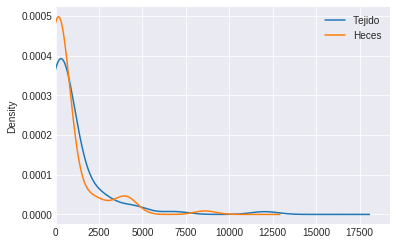

In [51]:
mbm[['Tejido', 'Heces']].plot(kind='kde')
plt.xlim(0);

## Caso de estudio: El Titanic

Hasta ahora hemos visto algunas de las funciones más básicas de Pandas, equipados con estos conocimientos haremos un análisis de un conjunto de datos muy usando en Ciencia de Datos, estos datos tienen información sobre el famoso y trágico viaje del transatlántico Titanic.

Usando este conjunto de datos intentaremos contestar una serie de preguntas relacionadas con las chances de supervivencia:

* ¿Qué porcentaje de las personas a bordo sobrevivieron?
* ¿Existió alguna relación entre la tasa de supervivencia y el costo del pasaje?
* ¿Se salvaron _mujeres y niños primero_ como dice la conocida frase?


**Podemos tomarnos un momento para pensar sobre estas preguntas y tratar de aventurar algunas respuestas, luego veremos si los datos se condicen con nuestras sospechas.**
<br>
<br>
<br>
<br>

Empecemos cargando los datos

In [52]:
titanic = pd.read_csv('datos/Titanic.csv')
print(titanic.shape)
titanic.head()

(1310, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Se puede ver que tenemos información sobre 1310 personas (filas) que estuvieron a bordo y para cada persona tenemos 14 variables (columnas). En _machinelearngua_ se le suele llamar _features_ a las variables. 

**¿Qué tipos de variables se corresponden con cada columna?**
<br>
<br>
<br>
<br>


Recordemos que podemos acceder a los nombres de las variables mediante el atributo `columns`.

In [53]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

Para algunas de estas variables veamos que porcentaje de datos faltantes tenemos:

In [54]:
for i in ['fare', 'pclass', 'age', 'sex']:
    print('{:8s}{:4.1f} % datos faltantes'.format(i, titanic[i].isnull().mean() * 100))

fare     0.2 % datos faltantes
pclass   0.1 % datos faltantes
age     20.2 % datos faltantes
sex      0.1 % datos faltantes


Podemos ver que los registros están casi completos excepto para la edad (`age`), variable para la cual el 20% de los datos son faltantes. Luego volveremos sobre esto, por ahora tratemos de constestar cual fue el porcentaje de sobrevivientes. Dado que los sobrevivientes están indicados con `1.0` y los fallecidos con `0.0`, podemos obtener el porcentaje de sobrevivientes haciendo:

In [55]:
round(titanic['survived'].mean() * 100, 0)

38.0

Pero esta no es la única forma de hacerlo, una forma alternativa de calcular el número de sobrevivientes y fallecidos es:

In [56]:
(titanic['survived'].value_counts(normalize=True) * 100).round(0)

0.0    62.0
1.0    38.0
Name: survived, dtype: float64

¿Habrá alguna diferencia para los sobrevivientes en función del costo del boleto que pagaron?

In [57]:
boleto_fallecidos = titanic['fare'][titanic['survived'] == 0]
boleto_sobrevivientes = titanic['fare'][titanic['survived'] == 1]

In [58]:
'£{:.0f}, £{:.0f}'.format(boleto_fallecidos.mean(), boleto_sobrevivientes.mean())

'£23, £49'

Podemos ver que en promedio el grupo de fallecidos pagó menos que el grupo de sobrevivientes. 

Veamos estos mismos datos, pero de forma gráfica.

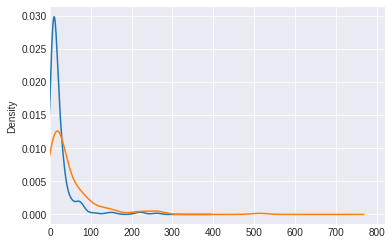

In [59]:
boleto_fallecidos.plot(kind='kde')
boleto_sobrevivientes.plot(kind='kde')

plt.xlim(0);  # valores por debajo de 0 no tienen sentido

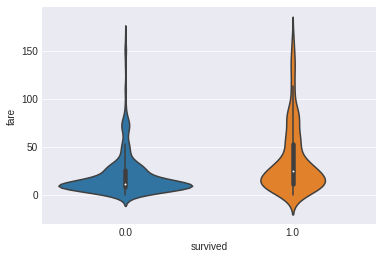

In [60]:
sns.violinplot(x="survived", y="fare", data=titanic[titanic['fare'] < 200]);

Veamos que además de la variable continua `fare` tenemos la variable discreta `pclass` que toma 3 valores de acuerdo a si las personas viajaban en primera (1), segunda (2) o tercera (3) clase. Veamos que nos dicen los datos cuando exploramos la tasa de supervivencia en función de la clase.

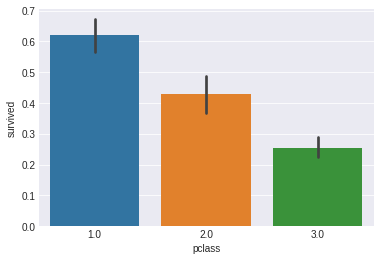

In [61]:
sns.barplot(x="pclass", y="survived", data=titanic);

El plot anterior incluye barras de error, por defecto, es posible removerlas pasando como argumento `ci=None`. 

**¿Consideran correcto usar barras de error en este caso particular? Discutan y fundamenten con sus pares**

<br>
<br>
<br>
<br>

## Ejercicios

Ya hemos contestado las dos primeras preguntas que nos hicimos. Ahora llegó el turno de explorar la tercer pregunta. Usaremos la siguiente lista como guía para explorar estas preguntas y para obtener información de este conjunto de datos, pero somos libres de  ir más allá de este listado y sumar otras preguntas o análisis.


1. Repitamos los análisis anteriores pero en términos de mujeres y hombres en vez de "ricos" y "pobres"
2. La función `sns.barplot` tiene un argumento llamado `hue` que podemos usar para combinar información de clase, género y supervivencia. 
3. Pandas incluye una función llamada `crosstab` que puede sernos útil para analizar estas diferencias de genero. Esta función tiene varios argumentos probemos usar `normalize`.
4. ¿Cuál es la media, mediana y desviación estándar de las edades? ¿Cual es la distribución de las edades?
5. ¿Cuantos de los datos faltantes corresponden a hombres, cuantos a mujeres, cuantos a hombres que viajaban en clase baja?